# **Pre-Processing Tutorial**

Francisco José Salamanca

Data mining - 2025-1

National University of Colombia

Data preprocessing consists of a broad set of techniques for **cleaning, selecting, and transforming data** to improve data mining analysis.

##**1. Issues with Data Quality**

Some common problems are:
* noise
* outliers
* missing values
* duplicated data

In [1]:
import pandas as pd


#Load data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### **1.1 NAN Values**
In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances

Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

In [3]:
import numpy as np

#replace.? for nan value
data = data.replace('?',np.nan)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Instead of replacing the missing values, another common approach is to **discard the data points** that contain missing values. This can be easily accomplished by applying the **dropna() function** to the data frame.

In [9]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))
print("16 entries deleted")

Number of rows in original data = 699
Number of rows after discarding missing values = 683
16 register deleted


#### **1.1.1 Imputation Techniques**

##### **1.1.1.1 Median imputation**

One treatment or **Imputation method** is replace them with the **median value** of that column

In [5]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = pd.to_numeric(data['Bare Nuclei'], errors='coerce')
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])



Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


##### **1.1.1.2 k-means Imputation**

### **1.2. Outliers**

Outliers are data instances with characteristics that are considerably different from the rest of the dataset.
To target the outliers, one common manner is with **boxplots**, one per each variable.

<Axes: >

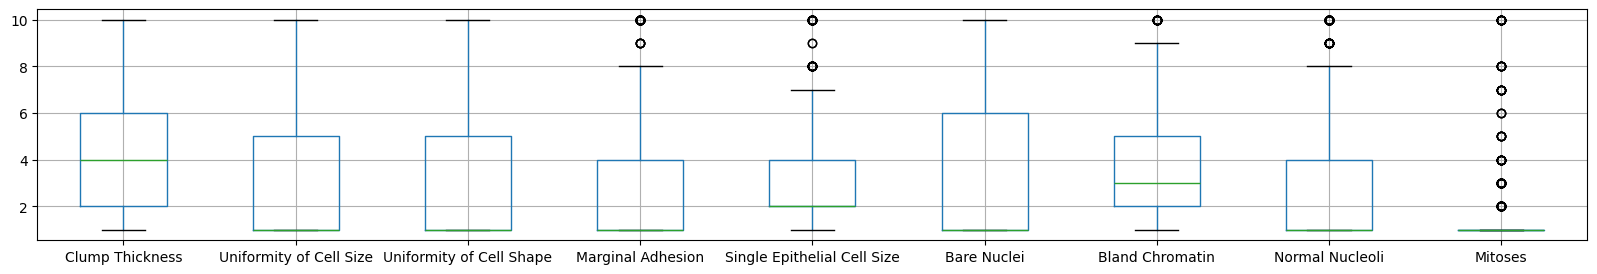

In [10]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3). Another way to remove them is with Tuckey Criteria.

In [11]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [13]:
#Discarding columns with Z > 3 or Z <= -3.

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))


Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


### **1.3. Duplicated Data**

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances.

In [14]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [16]:
#Discard them
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## **2. Aggregation**

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes:


*   Reducing the size of data to be processed
*   Changing the granularity of analysis (from fine-scale to coarser-scale)
*   Improving the stability of the data.




Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

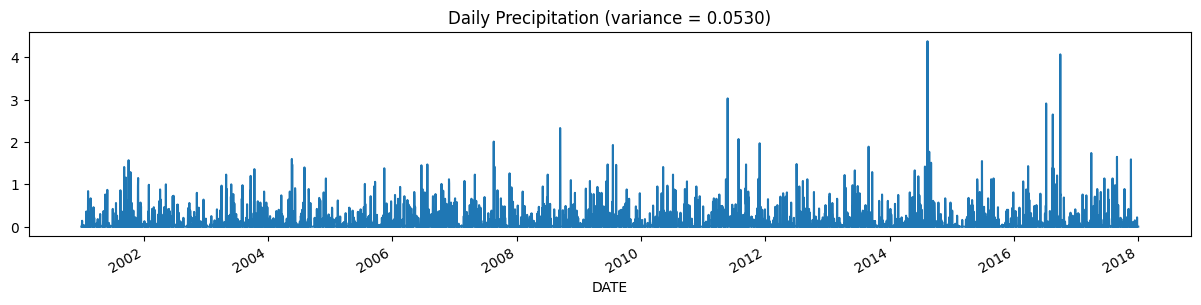

In [21]:
daily = pd.read_csv('/content/drive/MyDrive/Bioinformatica Msc. - UNAL/Data Mining/Taller_2_Preprocessing/DTW_prec - DTW_prec.tsv', header='infer', sep='\t')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))



Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. The time series can be grouped and aggregated by **month** instead of days, to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

<ipython-input-22-5ae1711a1e83>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily.groupby(pd.Grouper(freq='M')).sum()


Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

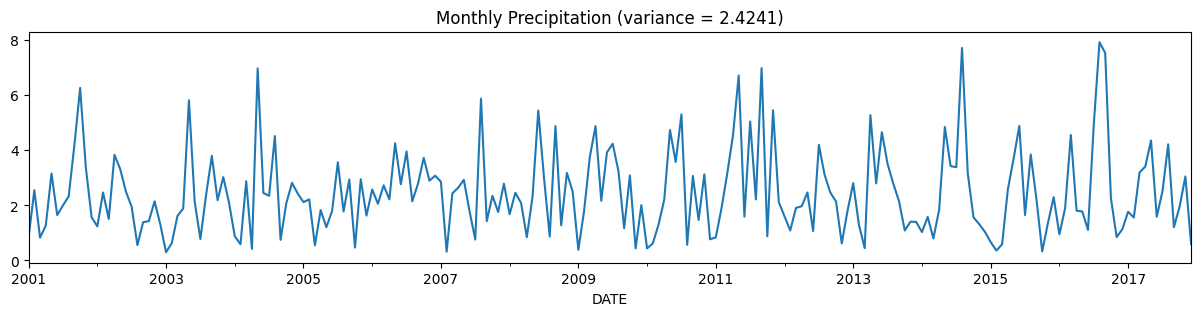

In [22]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

<ipython-input-23-46ed05734b2b>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = daily.groupby(pd.Grouper(freq='Y')).sum()


Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

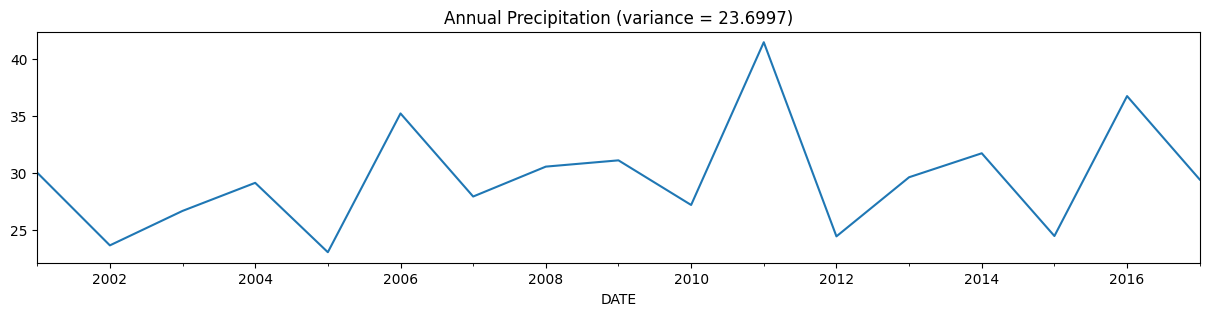

In [23]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

The variance get high in order to the aggregation, but the noise get low

## **3. Sampling**

Sampling is an approach commonly used to facilitate



*   **data reduction for exploratory data analysis** and scaling up algorithms to big data applications and
*   **quantifying uncertainties due to varying data distributions**.


There are various methods available for data sampling, such as **sampling without replacement**, where each selected instance is removed from the dataset, and **sampling with replacement**, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.






In [24]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [25]:
#In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.


sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
672,2,1,1,1,2,1,3,1,1,2
166,5,6,7,8,8,10,3,10,3,4
142,9,5,5,4,4,5,4,3,3,4


In [26]:
#In the next example, we randomly select 1% of the data (without replacement) and display the selected samples.
#The random_state argument of the function specifies the seed value of the random number generator.

sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [29]:
#Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data.
#You should be able to observe duplicate instances in the sample by increasing the sample size.

sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


## **4. Discretization**

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute.

,count
Clump Thickness,
5,130
3,108
6,34
4,80
8,46
1,145
2,50
7,23
10,69


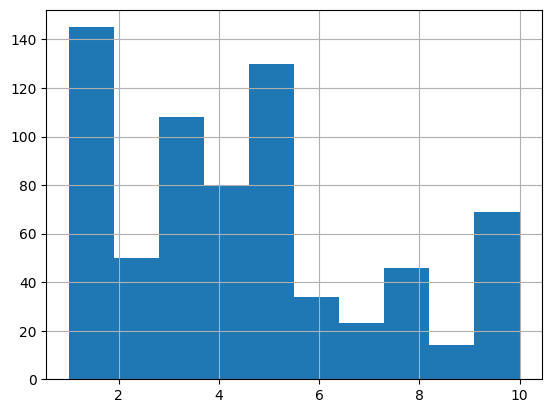

In [30]:
#First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.

data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)


In [31]:
#For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths.
# The value_counts() function can be used to determine the number of instances in each bin.

#Each class will have the same aperture range, but different frequency

bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

,count
Clump Thickness,
"(0.991, 3.25]",303
"(3.25, 5.5]",210
"(5.5, 7.75]",57
"(7.75, 10.0]",129


In [32]:
#For the equal frequency method, the qcut() function can be used to partition the values
#into 4 bins such that each bin has nearly the same number of instances.

#Each class will have the same frequency (counts), but different range

bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

,count
Clump Thickness,
"(0.999, 2.0]",195
"(2.0, 4.0]",188
"(4.0, 6.0]",164
"(6.0, 10.0]",152


## **5. Dimensionality Reduction**

### **5.1. Principal Component Analysis (PCAs)**

Principal component analysis (PCA) is a classical method for reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes (also known as components) created by PCA have the following properties:



*   They are linear combinations of the original attributes
*   They are orthogonal (perpendicular) to each other
*   They capture the maximum amount of variation in the data.





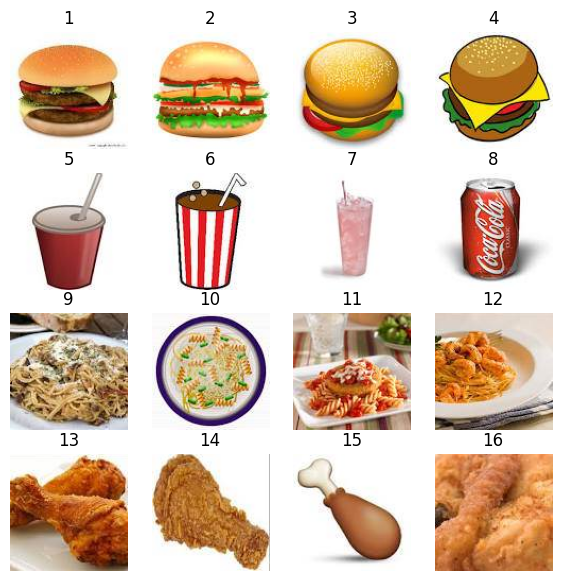

In [34]:
###The example below illustrates the application of PCA to an image dataset.
#There are 16 RGB files, each of which has a size of 111 x 111 pixels.
# The example code below will read each image file and convert the RGB image into a 111 x 111 x 3 = 36963 feature values.
#This will create a data matrix of size 16 x 36963.

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = '/content/drive/MyDrive/Bioinformatica Msc. - UNAL/Data Mining/Taller_2_Preprocessing/pics/Picture'+str(i)+'.jpg'


    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])


In [36]:
#Using PCA, the data matrix is projected to its first two principal components.
#The projected values of the original image data are stored in a pandas DataFrame object named projected.



import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,1592.800834,-6655.124676,burger
2,513.052994,-6331.155828,burger
3,-963.236676,-7208.253021,burger
4,-2165.074190,-9039.599655,burger
5,7842.455038,1063.540811,drink
6,8458.905432,5385.990683,drink
7,11181.758405,5356.948172,drink
8,6831.066355,-1127.053912,drink
9,-7639.905250,5058.369935,pasta
10,704.450482,531.618392,pasta


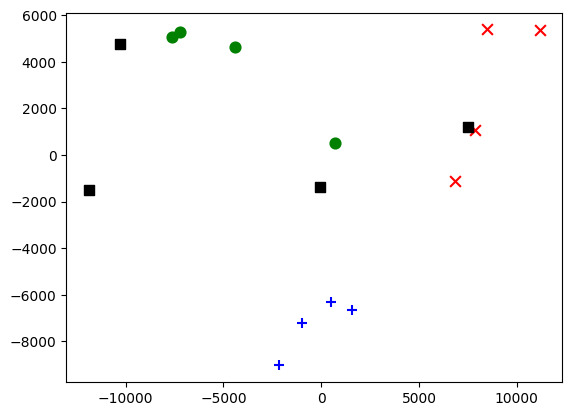

In [37]:
#Finally, we draw a scatter plot to display the projected values.
#Observe that the images of burgers, drinks, and pastas are all projected to the same region.
#However, the images for fried chicken (shown as black squares in the diagram) are harder to discriminate.

import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

#in images the correct way to classify, is reducing the dimensionality, then, review the distances between each classes.
#and do somo classification methos as k neightbors.

###**5.2. Kernel PCA**

Se utilizará el conjunto de datos makemoons. Se utilizará la funcion de kernel "rbf" (Radial Basis Function) y finalmente quedaran 2 dimensiones, donde las clases se separan linealmente.
The RBF kernel on two samples $\mathbf{x}$ y $\mathbf{x'}$ es definido como:


${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}$

Donde ${\displaystyle \textstyle \|\mathbf {x} -\mathbf {x'} \|^{2}}$ es la distancia Euclideana entre los dos objetos.

We'll use the makemoons datasets. Using the kernel functions "Radial Basis Function", finally 2 dimensions will remain, where the classes are separable lineally.

The RBF kernel of two samples x, x' are defined as:


${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}$

Where ${\displaystyle \textstyle \|\mathbf {x} -\mathbf {x'} \|^{2}}$ is the euclidian distance between the two objects.

Text(0, 0.5, '$x_2$')

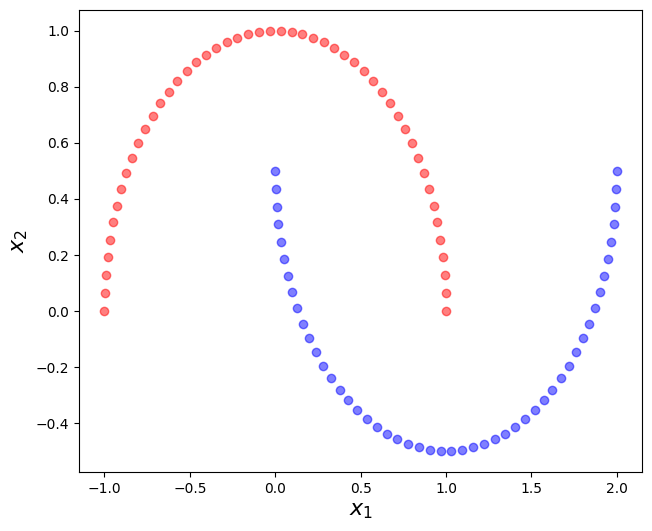

In [38]:
#Ejemplo de Kernel PCA
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

x, y = make_moons (n_samples = 100, random_state = 123)
XKPCA = KernelPCA (n_components = 2, kernel = 'rbf', gamma = 15). fit_transform (x)

plt.figure (figsize = (16, 6))

# figure 1
plt.subplot (1, 2, 1)
plt.scatter (x [y == 0, 0], x [y == 0, 1], color = 'red', alpha = 0.5)
plt.scatter (x [y == 1, 0], x [y == 1, 1], color = 'blue', alpha = 0.5)

plt.xlabel ("$x_1$", fontsize = 16)
plt.ylabel ("$x_2$", fontsize = 16)

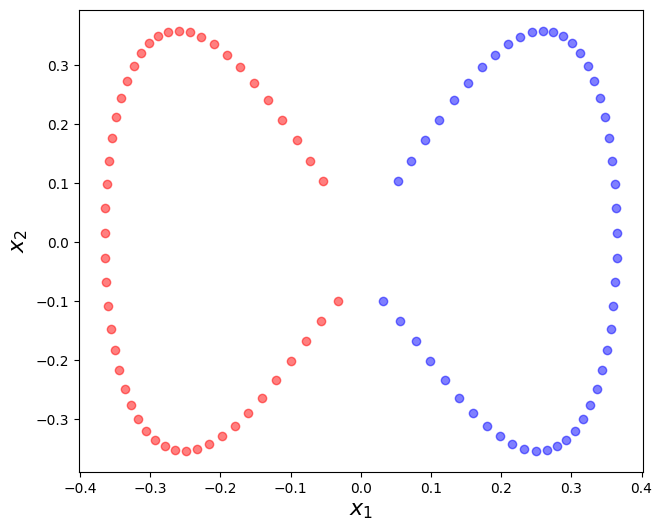

In [39]:
#Kernel PCA
plt.figure (figsize = (16, 6))

# figure 2
plt.subplot (1, 2, 2)
plt.scatter (XKPCA [y == 0, 0], XKPCA [y == 0, 1], color = 'red', alpha = 0.5)
plt.scatter (XKPCA [y == 1, 0], XKPCA [y == 1, 1], color = 'blue', alpha = 0.5)

plt.xlabel ("$x_1$", fontsize = 16)
plt.ylabel ("$x_2$", fontsize = 16)

plt.show ()